### Photo Metadata
Each pet photo is labeled with the value of 1 (Yes) or 0 (No) for each of the following features:

* Focus - Pet stands out against uncluttered background, not too close / far.
* Eyes - Both eyes are facing front or near-front, with at least 1 eye / pupil decently clear.
* Face - Decently clear face, facing front or near-front.\\
* Near - Single pet taking up significant portion of photo (roughly over 50% of photo width or height).
* Action - Pet in the middle of an action (e.g., jumping).
* Accessory - Accompanying physical or digital accessory / prop (i.e. toy, digital sticker), excluding collar and leash.
* Group - More than 1 pet in the photo.
* Collage - Digitally-retouched photo (i.e. with digital photo frame, combination of multiple photos).
* Human - Human in the photo.
* Occlusion - Specific undesirable objects blocking part of the pet (i.e. human, cage or fence). Note that not all blocking objects are considered occlusion.
* Info - Custom-added text or labels (i.e. pet name, description).
* Blur - Noticeably out of focus or noisy, especially for the pet’s eyes and face. For Blur entries, “Eyes” column is always set to 0.

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
path = '/mnt/hdd1/wearly/kaggle/petfinder/data/'

train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')
train_jpg_directory = '/mnt/hdd1/wearly/kaggle/petfinder/data/train/'

In [3]:
train

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


In [4]:
pr = train.profile_report()
pr

## Eyes

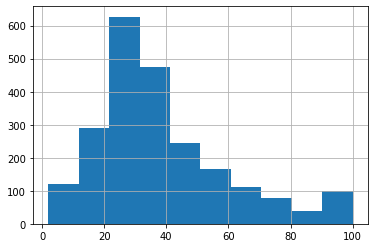

In [13]:
(train[train.Eyes != 1].Pawpularity).hist();

<AxesSubplot:>

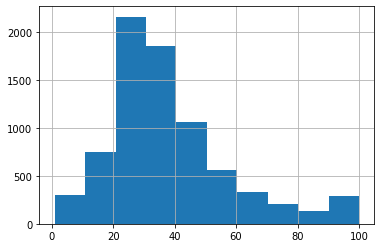

In [14]:
(train[train.Eyes != 0].Pawpularity).hist()

In [5]:
print(np.mean(train[train.Eyes != 1].Pawpularity))
print(np.mean(train[train.Eyes != 0].Pawpularity))

38.29281277728483
37.96435100548446


## Face

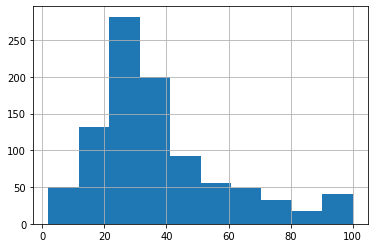

In [16]:
(train[train.Face != 1].Pawpularity).hist();

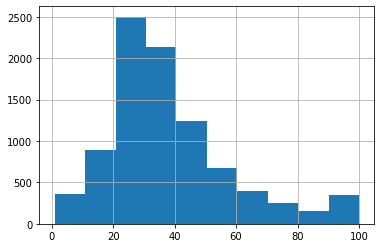

In [17]:
(train[train.Face != 0].Pawpularity).hist();

In [6]:
print(np.mean(train[train.Face != 1].Pawpularity))
print(np.mean(train[train.Face != 0].Pawpularity))

37.53256302521008
38.09285714285714


## Near

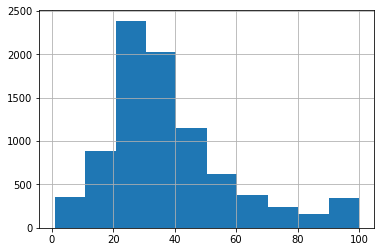

In [18]:
(train[train.Near != 0].Pawpularity).hist();

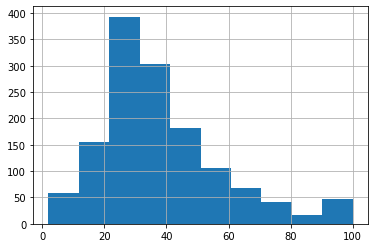

In [19]:
(train[train.Near != 1].Pawpularity).hist();

In [20]:
train = train.sort_values(by='Pawpularity',ascending=False)
train.head(10)

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
6930,b2eed3052c0e2d8965dfea7b50d04676,0,1,1,1,0,0,0,0,0,0,0,0,100
2910,4b22a815aecff494a98e915b3ffbed2f,0,1,1,1,0,1,0,0,0,1,1,0,100
1763,2cbf22ad632308b3c15608ed2b7cb0a6,0,0,1,1,0,0,0,0,1,1,0,1,100
8550,dd7c17537deb50d1e2aebae389bbf7f4,0,0,0,1,0,1,0,0,0,1,1,0,100
1138,1d25ea88a9731004fdef8c3c4d5bfeac,0,1,1,1,0,0,0,0,0,0,0,0,100
4919,7e761f47cc1e3038a431f9f196234ab9,0,1,1,1,0,0,0,0,0,1,0,0,100
2446,3edf4c57b6e2eb47187d3bc966093de2,0,1,1,1,0,0,0,0,0,0,0,0,100
5828,96d5b61bde2a4699132d7699a0a70336,0,1,1,1,0,0,0,0,0,0,0,0,100
1773,2cd7291b650f99ef2ab3e9b0db9fd2fc,0,1,1,1,0,0,0,0,0,0,0,0,100
8196,d46bd657c317c36412b3d2e26bf8d12a,0,1,1,1,0,0,0,0,1,1,0,0,100


## Display Image by Pawpularity

In [21]:
%matplotlib inline

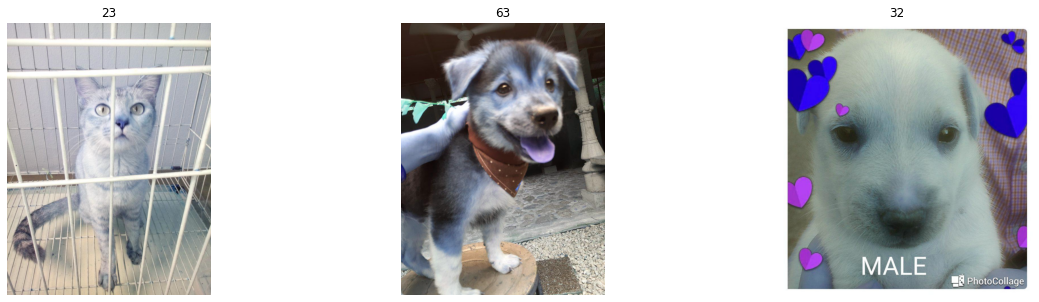

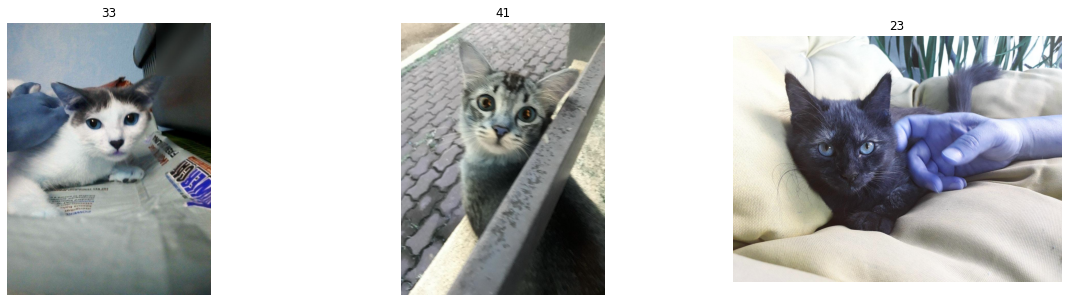

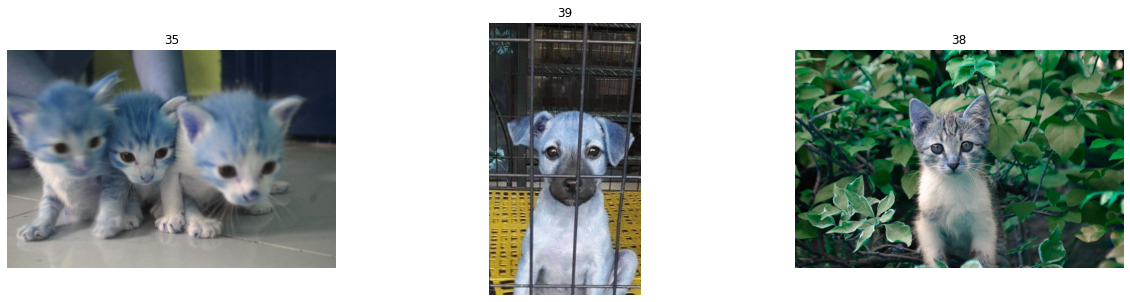

In [23]:
def displayDF(train, random=False, cols=3,rows=3, path=train_jpg_directory):
    for k in range(rows):
        plt.figure(figsize=(20,5))
        for j in range(cols):
            if random: row = np.random.randint(0,len(train))
            else: row = cols*k + j #?
            name = train.iloc[row,0] #image
            pop = train.iloc[row,-1]
#             title = train.iloc[row,3] #title
#             title_with_return = ""
#             for i,ch in enumerate(title):
#                 title_with_return += ch
#                 if (i!=0)&(i%20==0): title_with_return += '\n' #20번째 row마다 줄바꿈
            img = cv2.imread(path+name+'.jpg')
            plt.subplot(1,cols,j+1)
            plt.title(pop)
            plt.axis('off')
            plt.imshow(img)
        plt.show()

displayDF(train,random=True)